<a href="https://colab.research.google.com/github/Greqorian/IKEA_Products_Recognition_AI/blob/main/IKEA_Products_Recognition_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IKEA Products Recognition AI
### Research on training a neural network model for IKEA store product recognition
---
Model training is based on technology provided by the FastAi library. 
Training is repeated 7 times, increasing the number of object classes to recognize and the number of images to train the model.

The results of all tests summarized in the table:

| Research number | Product classes | Number of images | Accuracy achieved | Time consumed |
|-----------------|-----------------|------------------|-------------------|---------------|
| 1               | 5               | 25               | 71%               | 0,0013 h      |
| 2               | 5               | 805              | 97%               | 0,7 h         |
| 3               | 30              | 282              | 73 %              | 0,13 h        |
| 4               | 30              | 3660             | 95%               | 2,33 h        |
| 5               | 100             | 940              | 71%               | 0,5 h         |
| 6               | 100             | 10192            | 94%               | 8,5 h         |
| 7               | 1000            | 92301            | -                 | ~ 39 h        |

# 0. Research preparation

### 0.1 Install FastAI

In [7]:

! [ -e /content ] && pip install -Uqq fastai  # upgrade fastai on colab

### 0.2 Import libraries

In [ ]:
# package imports
#basics
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import json # json files

#visualisation
from matplotlib import pyplot as plt
#fastai
import torch
from fastai.vision.all import *
from fastai.vision.augment import *
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

import pickle


### 0.3 Mount Storage

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Reseaerch 1 : 5 classes / 805 pictures

1.1 Open list with labels

In [ ]:
# Opening JSON file
f = open('/content/drive/MyDrive/DATA/furnitureImages/100-furniture/100-furniture-imagesList.json', "r")
# a dictionary
uniqueList = json.load(f)

### 1.2 Convert JSON to pandas data frame

In [ ]:
df1 = pd.json_normalize(uniqueList)
df1

### 1.3 Set path to folder with pictures

In [9]:
path = '/content/drive/MyDrive/DATA/furnitureImages/5-first-furnitureImages'
train_path = '/content/drive/MyDrive/DATA/furnitureImages/5-first-furnitureImages/train'

### 1.4 Prepare ImageDataLoader

In [ ]:
img_size = 128
augmentations = [
        Rotate(10, p=0.4, mode='bilinear'), 
        Brightness(max_lighting=0.3,p=0.5),
        Contrast(max_lighting=0.4, p=0.5),
        RandomErasing(p=0.3, sl=0.0, sh=0.2, min_aspect=0.3, max_count=1),
        Flip(p=0.5),
        Zoom(max_zoom=1,p=0.5),
        RandomResizedCrop(img_size)
    ]
dls = ImageDataLoaders.from_df(df=df,
                               path=path,
                               folder='train',
                               valid_pct = 0.2, 
                               bs = 30, 
                               device=device, 
                               num_workers=0, 
                               batch_tfms=augmentations, 
                               item_tfms=Resize(img_size))

### 1.5 Prepare ImageDataLoader

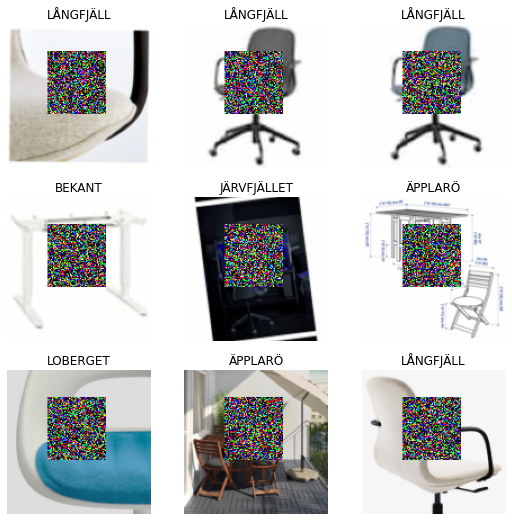

In [ ]:
dls.show_batch()

### 1.6 Model training

In [ ]:
learn = cnn_learner(dls, 
                    resnet34, 
                    metrics=[accuracy,error_rate])

### 1.7 Show batch of images

SuggestedLRs(valley=0.0020892962347716093)

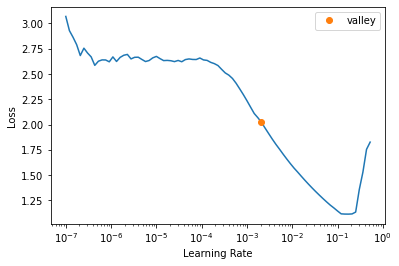

In [ ]:
learn.lr_find()

### 1.8 Fit the model

In [ ]:
learn.fine_tune(10)

### 1.9 Show results

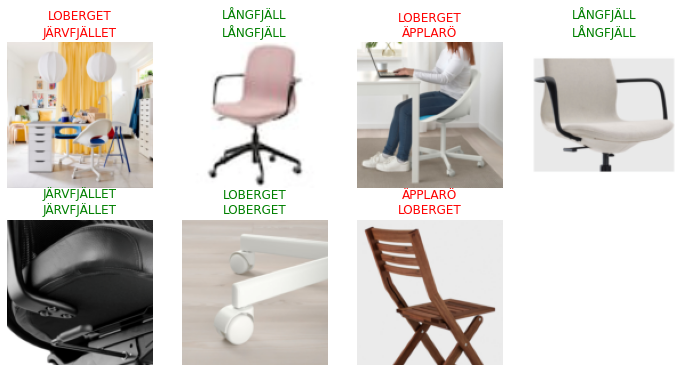

In [ ]:
learn.show_results()

# Reseaerch 2 : 30 classes / 282 pictures

### 2.1 Open list with labels

In [ ]:
# Opening JSON file
f = open('/content/drive/MyDrive/DATA/furnitureImages/30-furniture/IkeaOnlineImagesList.json', "r")
# a dictionary
uniqueList = json.load(f)

### 2.2 Convert JSON to pandas data frame

In [ ]:
df1 = pd.json_normalize(uniqueList)
df1

### 2.3 Set path to folder with pictures

In [ ]:
path = '/content/drive/MyDrive/DATA/furnitureImages/30-furniture'
train_path = '/content/drive/MyDrive/DATA/furnitureImages/30-furniture/trainSmall'

### 2.4 Prepare ImageDataLoader and train model
> Here the method .from_df is used to load labels from pandas data frame
df = dataframe
valid_pct = % of the all pictures use as a control paket
folder = name of the folder where pictures are located



In [ ]:
dls2 = ImageDataLoaders.from_df(df=df1,
                               path=path,
                               folder='trainSmall',
                               valid_pct = 0.2, 
                               bs = 30, 
                               device=device, 
                               num_workers=0, 
                               item_tfms=Resize(460), 
                               batch_tfms=aug_transforms(size=224)
                              )
learn = cnn_learner(dls2, 
                    resnet34, 
                    metrics=[accuracy,error_rate])
learn.lr_find()


### 2.5 Fit the model

In [ ]:
learn.fine_tune(epochs=5,base_lr=0.003)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,4.111983,2.667656,0.303571,0.696429,01:30


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,2.136258,1.717372,0.535714,0.464286,01:51
1,1.567758,1.103112,0.696429,0.303571,01:51
2,1.147514,1.002653,0.732143,0.267857,01:52
3,0.906490,0.995234,0.732143,0.267857,01:52
4,0.735736,1.010790,0.732143,0.267857,01:52


### 2.6 Show results and show the image with the highest error rate


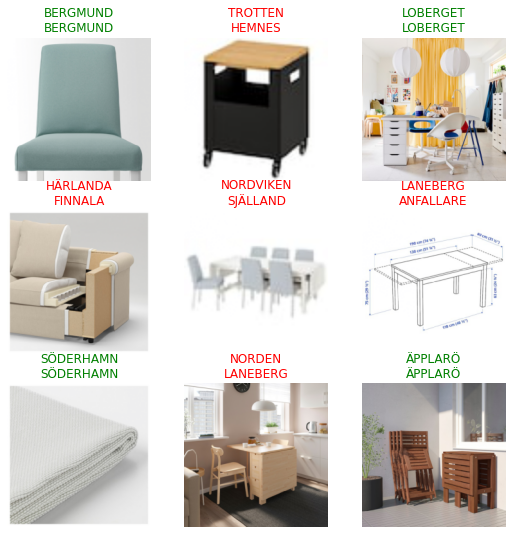

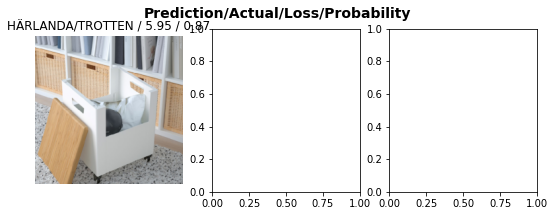

In [ ]:
learn.show_results()
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(3)

# Reseaerch 3 : 30 classes / 3660 pictures

### 3.1 Open list with labels

In [ ]:
# Opening JSON file
f = open('/content/drive/MyDrive/DATA/furnitureImages/30-furniture/ebayImagesList.json', "r")
# a dictionary
uniqueList2 = json.load(f)

### 3.2 Convert JSON to pandas data frame

In [ ]:
df2 = pd.json_normalize(uniqueList2)

### 2.3 Set path to folder with pictures

In [ ]:
path = '/content/drive/MyDrive/DATA/furnitureImages/30-furniture'
train_path = '/content/drive/MyDrive/DATA/furnitureImages/30-furniture/train'

### 3.4 Prepare ImageDataLoader
<br/>Here the method .from_df is used to load labels from pandas data frame 
> <br/>df = dataframe 
<br/>valid_pct = % of the all pictures use as a control paket
<br/>folder = name of the folder where pictures are located





In [ ]:
dls = ImageDataLoaders.from_df(df=df2,
                               path=path,
                               folder='train',
                               valid_pct = 0.2, 
                               bs = 30, 
                               device=device, 
                               num_workers=0, 
                               item_tfms=Resize(460), 
                               batch_tfms=aug_transforms(size=224)
                              )

### 3.5 Show batch of images

In [ ]:
dls.show_batch()

### 3.6 Train model

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

SuggestedLRs(valley=0.0012022644514217973)

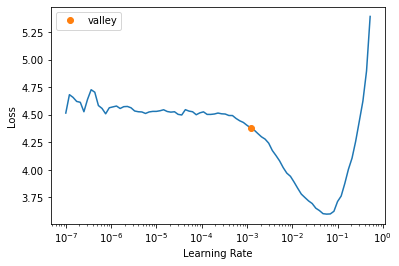

In [ ]:
learn = cnn_learner(dls, 
                    resnet34, 
                    metrics=[accuracy,error_rate])
learn.lr_find()

### 3.7 Fit the model

In [ ]:
learn.fine_tune(epochs=5,base_lr=0.003)

### 3.8 Show results

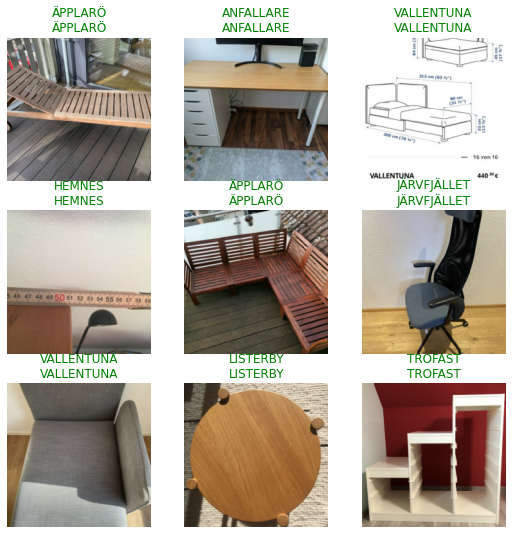

In [ ]:
learn.show_results()


### 3.9 Show the image with the highest error rate

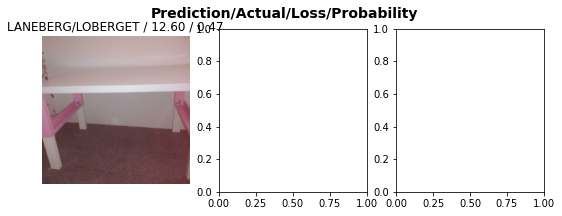

In [ ]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(3)

### 3.10 Set the directory for model

In [ ]:
os.chdir('/content/drive/MyDrive/DATA/furnitureImages/30-furniture')

### 3.11 Save the model to the selected directory

In [ ]:
learn.export('30items_model_.pkl')

# Reseaerch 4 : 100 classes / 940 pictures

### 4.1 Open list with labels

In [ ]:
# Opening JSON file
f = open('/content/drive/MyDrive/DATA/furnitureImages/100-furniture/IkeaOnlineImagesList.json', "r")
# a dictionary
uniqueList = json.load(f)

### 4.2 Convert JSON to pandas data frame

In [ ]:
df1 = pd.json_normalize(uniqueList)
df1

,title,name
0,0_60510640_JÄRVFJÄLLET_ikeaOnline.jpg,JÄRVFJÄLLET
1,1_60510640_JÄRVFJÄLLET_ikeaOnline.jpg,JÄRVFJÄLLET
2,2_60510640_JÄRVFJÄLLET_ikeaOnline.jpg,JÄRVFJÄLLET
3,3_60510640_JÄRVFJÄLLET_ikeaOnline.jpg,JÄRVFJÄLLET
4,4_60510640_JÄRVFJÄLLET_ikeaOnline.jpg,JÄRVFJÄLLET
...,...,...
935,935_80388587_STRANDTORP_ikeaOnline.jpg,STRANDTORP
936,936_80388587_STRANDTORP_ikeaOnline.jpg,STRANDTORP
937,937_80388587_STRANDTORP_ikeaOnline.jpg,STRANDTORP
938,938_80388587_STRANDTORP_ikeaOnline.jpg,STRANDTORP


### 4.3 Set path to folder with pictures

In [ ]:

path = '/content/drive/MyDrive/DATA/furnitureImages/100-furniture'
train_path = '/content/drive/MyDrive/DATA/furnitureImages/100-furniture/trainSmall'

### 4.4 Prepare ImageDataLoader and train the model

SuggestedLRs(valley=0.0012022644514217973)

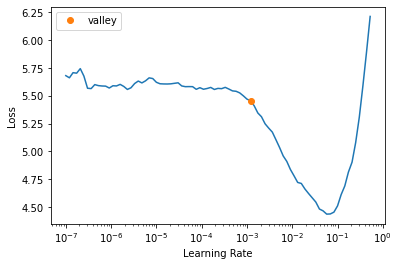

In [ ]:
dls2 = ImageDataLoaders.from_df(df=df1,
                               path=path,
                               folder='trainSmall',
                               valid_pct = 0.2, 
                               bs = 30, 
                               device=device, 
                               num_workers=0, 
                               item_tfms=Resize(460), 
                               batch_tfms=aug_transforms(size=224)
                              )
learn = cnn_learner(dls2, 
                    resnet34, 
                    metrics=[accuracy,error_rate])
learn.lr_find()


### 4.5 Fit the model

In [ ]:
 learn.fine_tune(epochs=5,base_lr=0.003)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,4.644146,2.412448,0.430851,0.569149,05:21


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,2.307196,1.849912,0.569149,0.430851,06:36
1,1.766073,1.637588,0.579787,0.420213,06:37
2,1.298173,1.321990,0.686170,0.313830,06:36
3,0.941712,1.244318,0.718085,0.281915,06:35
4,0.674446,1.235162,0.712766,0.287234,06:36


### 4.6 Show results and show the image with the highest error rate

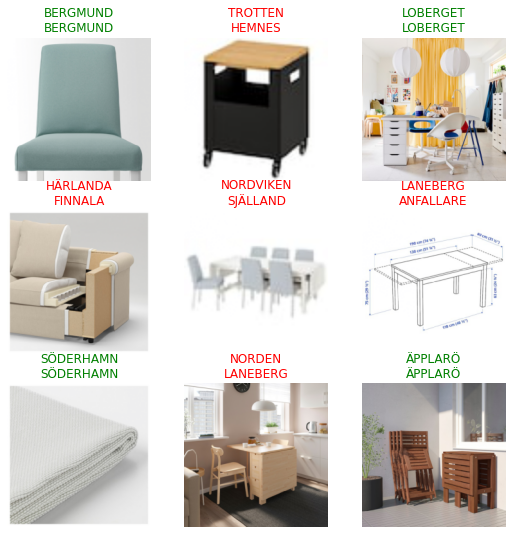

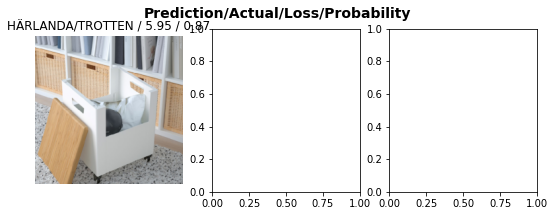

In [ ]:
learn.show_results()
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(3)

### 4.7 Show results

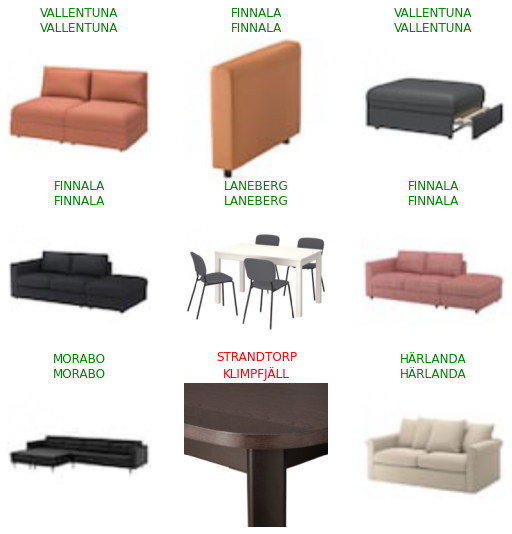

In [ ]:
learn.show_results()

# Reseaerch 5 : 100 classes / 10192 pictures

### 5.1 Open list with labels

In [ ]:
# Opening JSON file
f = open('/content/drive/MyDrive/DATA/furnitureImages/100-furniture/ebayImagesList.json', "r")
# a dictionary
uniqueList3 = json.load(f)

### 5.2 Convert JSON to pandas data frame

In [ ]:
df3 = pd.json_normalize(uniqueList3)
df3


### 5.3 Set path to folder with pictures

In [ ]:
path2 = '/content/drive/MyDrive/DATA/furnitureImages/100-furniture/'
train_path = '/content/drive/MyDrive/DATA/furnitureImages/100-furniture/train'

### 5.4 Prepare ImageDataLoader
<br/>Here the method .from_df is used to load labels from pandas data 

In [ ]:
dls2 = ImageDataLoaders.from_df(df=df3,
                               path=path2,
                               folder='train',
                               valid_pct = 0.2, 
                               bs = 30, 
                               device=device, 
                               num_workers=0, 
                               item_tfms=Resize(460), 
                               batch_tfms=aug_transforms(size=224)
                              )

### 5.6 Show batch of images

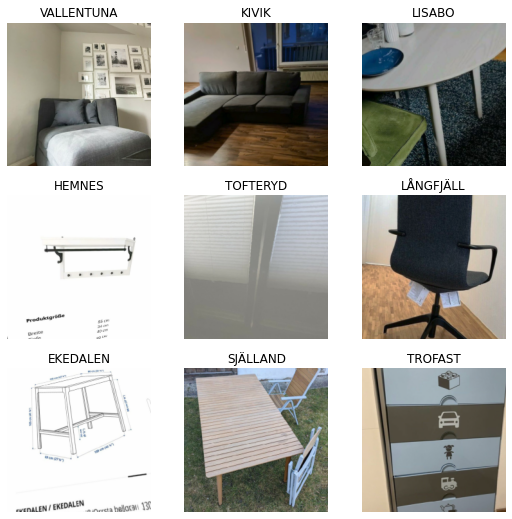

In [ ]:
dls2.show_batch()

### 5.7 Train model

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

SuggestedLRs(valley=0.0012022644514217973)

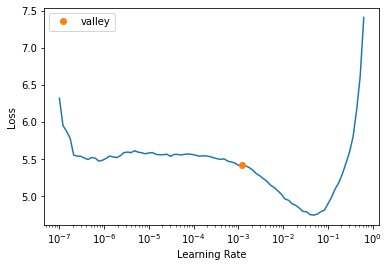

In [ ]:
learn = cnn_learner(dls2, 
                    resnet34, 
                    metrics=[accuracy,error_rate])
learn.lr_find()

### 5.8 Fit the model

In [ ]:
learn.fine_tune(epochs=6,base_lr=0.003)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,2.280327,1.359012,0.631501,0.368499,1:30:56


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.177174,0.684562,0.811580,0.188420,1:24:12
1,0.953232,0.661048,0.814524,0.185476,1:25:38
2,0.698789,0.394194,0.892542,0.107458,1:26:30
3,0.392951,0.285529,0.919529,0.080471,1:26:10


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.177174,0.684562,0.811580,0.188420,1:24:12
1,0.953232,0.661048,0.814524,0.185476,1:25:38
2,0.698789,0.394194,0.892542,0.107458,1:26:30
3,0.392951,0.285529,0.919529,0.080471,1:26:10
4,0.208894,0.215240,0.942591,0.057409,1:25:35
5,0.153199,0.206773,0.948970,0.051030,1:25:43


### 5.9 Set the directory for model

In [ ]:
os.chdir('/content/drive/MyDrive/DATA/furnitureImages/100-furniture')

### 5.10 Save the model to the selected directory

In [ ]:
learn.export('100items_model_.pkl')

5.11  Show results and show the image with the highest error rate

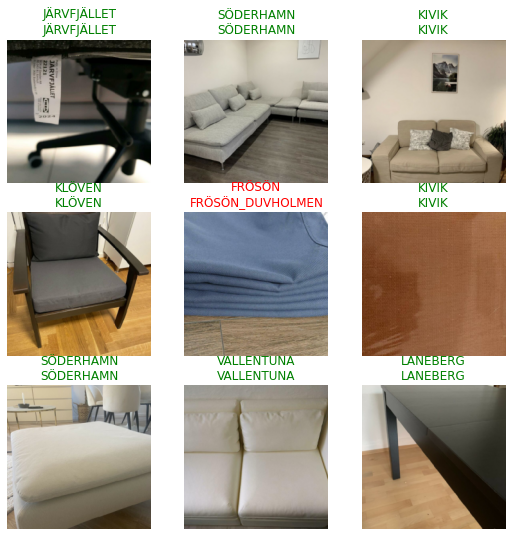

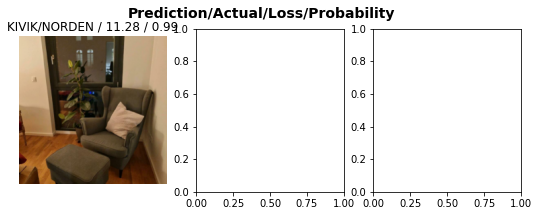

In [ ]:
learn.show_results()
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(3)